In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import cv2
from keras.models import Model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout
from keras.layers import Input, Concatenate, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Average
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

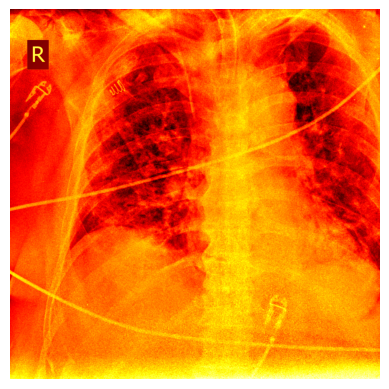

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/COVID19/COVID19(0).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
heatmap = plt.cm.hot(normalized_gray)
plt.imshow(heatmap)
plt.axis('off')
plt.show()

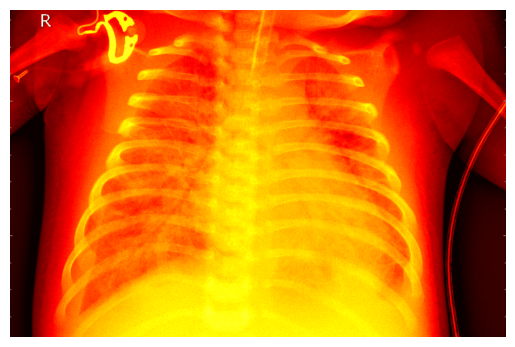

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
heatmap = plt.cm.hot(normalized_gray)
plt.imshow(heatmap)
plt.axis('off')
plt.show()

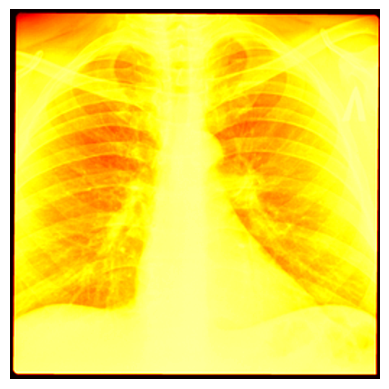

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/TURBERCULOSIS/Tuberculosis-10.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
heatmap = plt.cm.hot(normalized_gray)
plt.imshow(heatmap)
plt.axis('off')
plt.show()

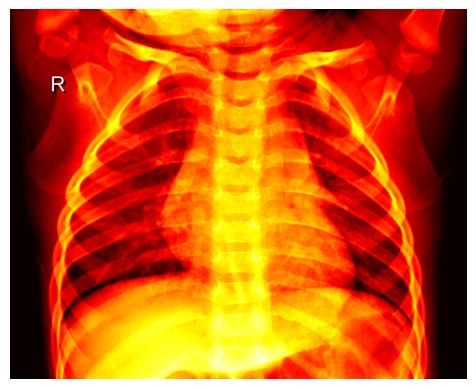

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/NORMAL/IM-0117-0001.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
normalized_gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
heatmap = plt.cm.hot(normalized_gray)
plt.imshow(heatmap)
plt.axis('off')
plt.show()

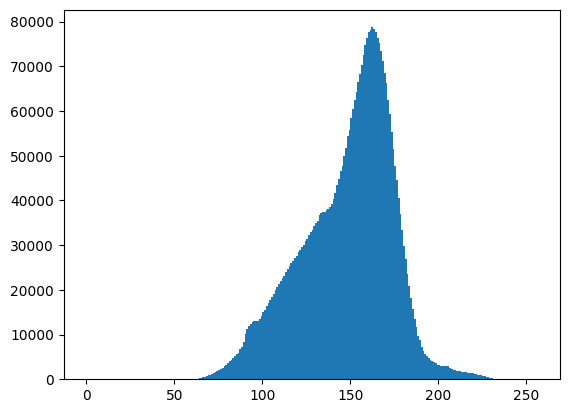

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/COVID19/COVID19(0).jpg', 0)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

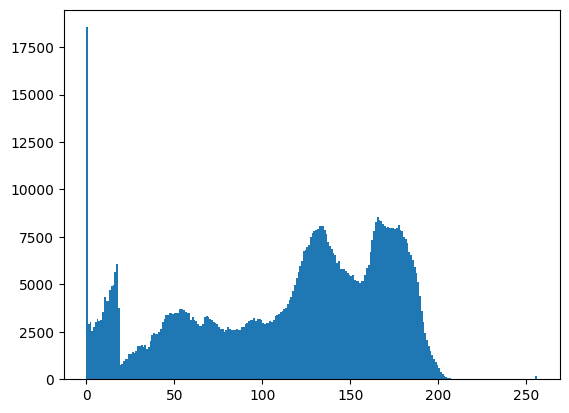

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/PNEUMONIA/person1000_bacteria_2931.jpeg', 0)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

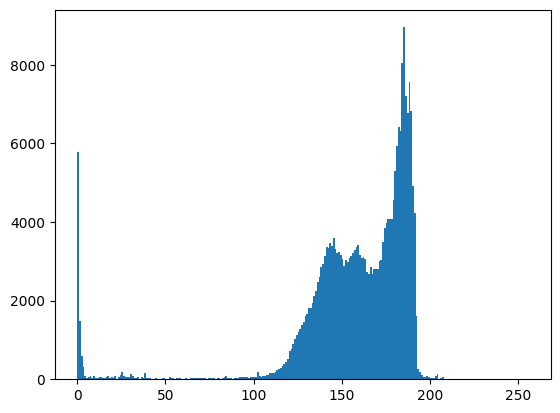

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/TURBERCULOSIS/Tuberculosis-10.png', 0)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

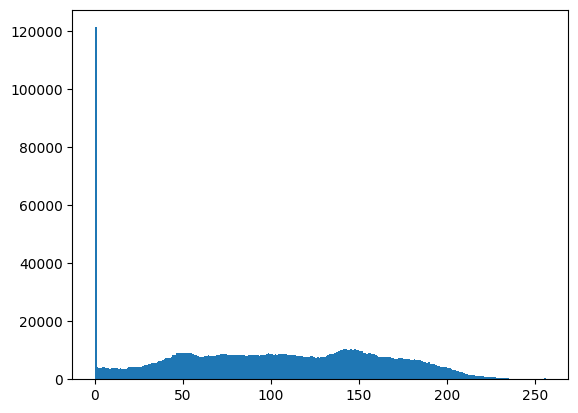

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive (2)/train/NORMAL/IM-0117-0001.jpeg', 0)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [ ]:
vgg16 = VGG16(input_shape=(224,224,3),weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = True

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg19 = VGG19(input_shape=(224,224,3),weights='imagenet', include_top=False)
for layer in vgg19.layers:
    layer.trainable = True

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
resnet = ResNet50(input_shape=(224,224,3),weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = True


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
x=vgg16.output
x=MaxPooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
output=Dense(4,activation='softmax')(x)
model1=Model(inputs=vgg16.inputs,outputs=output)

In [ ]:
z=resnet.output
z=MaxPooling2D()(z)
z=Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.02))(z)
z=Dropout(0.1)(z)
z=Flatten()(z)
output3=Dense(4,activation='softmax')(z)
model3=Model(inputs=resnet.inputs,outputs=output3)

In [6]:
IMAGESHAPE = [224, 224, 3] 
training_data = '/content/gdrive/MyDrive/archive (2)/train'
testing_data = '/content/gdrive/MyDrive/archive (2)/test'

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.5])
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [8]:
training_set = train_datagen.flow_from_directory(training_data, 
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 6326 images belonging to 4 classes.


In [9]:
test_set = testing_datagen.flow_from_directory(testing_data,
                                               target_size = (224, 224),
                                               batch_size = 16,
                                               class_mode = 'categorical')


Found 771 images belonging to 4 classes.


In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
fitted_model1 =model1.fit_generator( 
  training_set,
  validation_data=test_set,
  epochs=20,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

In [ ]:
model1.save('/content/gdrive/MyDrive/vgg16.hdf5')

In [ ]:
plot.plot(fitted_model1.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model1.history['val_loss'], label='validation loss')
plot.legend()
plot.show()

plot.plot(fitted_model1.history['accuracy'], label='training accuracy')
plot.plot(fitted_model1.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()

In [ ]:
fitted_model2 =model2.fit_generator( 
  training_set,
  validation_data=test_set,
  epochs=20,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

<ipython-input-10-cf699fffab2d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model2 =model2.fit_generator(


Epoch 1/20
50/50 [==============================] - 857s 16s/step - loss: 5.6599 - accuracy: 0.5659 - val_loss: 1.1888 - val_accuracy: 0.5058
Epoch 2/20
50/50 [==============================] - 235s 5s/step - loss: 0.9506 - accuracy: 0.6456 - val_loss: 0.8893 - val_accuracy: 0.6459
Epoch 3/20
50/50 [==============================] - 231s 5s/step - loss: 0.5983 - accuracy: 0.7656 - val_loss: 0.8076 - val_accuracy: 0.6926
Epoch 4/20
50/50 [==============================] - 235s 5s/step - loss: 0.4510 - accuracy: 0.8157 - val_loss: 0.4921 - val_accuracy: 0.8106
Epoch 5/20
50/50 [==============================] - 228s 5s/step - loss: 0.4393 - accuracy: 0.8299 - val_loss: 0.5451 - val_accuracy: 0.7860
Epoch 6/20
50/50 [==============================] - 235s 5s/step - loss: 0.3436 - accuracy: 0.8647 - val_loss: 0.4919 - val_accuracy: 0.8042
Epoch 7/20
50/50 [==============================] - 230s 5s/step - loss: 0.3090 - accuracy: 0.8822 - val_loss: 0.5628 - val_accuracy: 0.7808
Epoch 8/20
5

In [ ]:
plot.plot(fitted_model2.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model2.history['val_loss'], label='validation loss')
plot.legend()
plot.show()

plot.plot(fitted_model2.history['accuracy'], label='training accuracy')
plot.plot(fitted_model2.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()

In [ ]:
model2.save('/content/gdrive/MyDrive/vgg19.hdf5')

In [ ]:
fitted_model3 =model3.fit( 
  training_set,
  validation_data=test_set,
  epochs=20,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

In [ ]:
model3.save('/content/gdrive/MyDrive/resnet50.hdf5')

In [ ]:
plot.plot(fitted_model3.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model3.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
plot.plot(fitted_model3.history['accuracy'], label='training accuracy')
plot.plot(fitted_model3.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()

In [11]:
model_1=load_model('/content/gdrive/MyDrive/vgg16.hdf5')
model_2=load_model('/content/gdrive/MyDrive/model.hdf5')
model_3=load_model('/content/gdrive/MyDrive/inception.hdf5')

In [12]:
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='vgg16')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='resnet50')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='inception')


In [ ]:
models = [model_1, model_2,model_3]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]

In [ ]:
models = [model_1, model_2,model_3]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output1 = Average()(model_outputs)
ensemble_model1 = Model(inputs=model_input, outputs=ensemble_output1, name='ensemble')

In [ ]:

ensemble_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ensemble_model1.summary()

In [ ]:
history=ensemble_model1.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    
)

Epoch 1/5
396/396 [==============================] - ETA: 0s - loss: 0.4885 - accuracy: 0.6105

In [13]:
x=model_1.predict(test_set).round(2)

49/49 [==============================] - 314s 6s/step


In [ ]:
print(x)

[[0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.63 0.2  0.05 0.12]
 ...
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]]


In [14]:
y=model_2.predict(test_set).round(2)

49/49 [==============================] - 107s 2s/step


In [ ]:
print(y)

[[0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 ...
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.   0.16 0.58]]


In [15]:
z=model_3.predict(test_set).round(2)

49/49 [==============================] - 67s 1s/step


In [47]:
print(z)

[[[  3   3   3]
  [  0   0   0]
  [  4   4   4]
  ...
  [ 68  68  68]
  [ 67  67  67]
  [ 67  67  67]]

 [[  6   6   6]
  [  5   5   5]
  [  2   2   2]
  ...
  [ 69  69  69]
  [ 66  66  66]
  [ 63  63  63]]

 [[  0   0   0]
  [  1   1   1]
  [  3   3   3]
  ...
  [ 70  70  70]
  [ 66  66  66]
  [ 61  61  61]]

 ...

 [[250 250 250]
  [  6   6   6]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [  1   1   1]
  [  6   6   6]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [  0   0   0]
  [  6   6   6]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [46]:
model.predict(test_set)

49/49 [==============================] - 476s 10s/step


array([[5.8307401e-03, 6.3478440e-01, 3.5911903e-01, 2.6582435e-04],
       [2.2834088e-06, 4.4995926e-05, 9.9995232e-01, 4.0656772e-07],
       [8.8599063e-03, 5.6637132e-01, 4.2447197e-01, 2.9678078e-04],
       ...,
       [1.7464650e-07, 5.9343016e-08, 9.9999988e-01, 2.2430262e-09],
       [2.3383251e-07, 7.0811731e-11, 9.9999976e-01, 3.2508454e-09],
       [5.8141961e-07, 8.6367241e-10, 9.9999940e-01, 9.4539843e-09]],
      dtype=float32)

In [34]:
print(p)

[[0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.02 0.36 0.62 0.  ]
 ...
 [0.   0.   1.   0.  ]
 [0.36 0.01 0.61 0.01]
 [0.06 0.41 0.51 0.02]]


In [36]:
p.shape

(771, 4)

In [ ]:
model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 4)            14995780    ['input_1[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, 4)            24638852    ['input_1[0][0]']                
                                                                                                  
 inception (Functional)         (None, 4)            22853924    ['input_1[0][0]']         